In [2]:
# sum of squares for error, SSE

import numpy as np
def sum_squares_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(sum_squares_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(sum_squares_error(np.array(y), np.array(t)))

predict label is 2
0.09750000000000003
predict label is 9
0.7967


In [4]:
# cross entropy error, CEE
# if y=0 np.log(y) go to -inf so we need to add a little value
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta))

In [5]:
# cross entropy error, CEE
# label's value is 2
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 2 is the highest possibility of softmax function
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
print('predict label is 2')
print(cross_entropy_error(np.array(y), np.array(t)))

# 9 is the highest possibility of softmax function
y = [0.01, 0.02, 0.03, 0.04, 0.02, 0.1, 0.0, 0.0, 0.0, 0.8]
print('predict label is 9')
print(cross_entropy_error(np.array(y), np.array(t)))

predict label is 2
0.510825457099338
predict label is 9
3.506554563992204


In [6]:
import sys, os

sys.path.append('G:\내 드라이브\book\Deep+learning_from_scratch')
from dataset.mnist import load_mnist

(x_train, t_train), (X_test, t_test) = load_mnist(normalize= True, one_hot_label= True)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000, 10)


In [7]:
# make 10 random dataset
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

np.random.choice(60000,10)

array([10369, 34813,   621, 47534, 52834, 13536, 26592, 10385, 27811,
       41065])

In [8]:
# cross_entropy_error for batch
# this code is label(one-hot-encoding)
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

        batch_size = y.shape[0]
        return -np.sum(t * np.log(y + 1e-07)) / batch_size

In [9]:
# we must use loss function then why we do not use accuracy?
# Loss functions are typically differentiable.
# which allows for the use of optimization algorithms like gradient descent to update the model parameters. 
# accuracy is not differentiable as it measures discrete

In [10]:
# implement differential
def bad_numerical_diff(f, x):
    h = 1e-50
    return (f(x + h) -f(x))/h

# 1e-50 makes roundging error
print(np.float32(1e-50))

def good_numerical_diff(f,x):
    h = 1e-4
    return (f(x + h) - f(x - h)) / (2 * h)

0.0


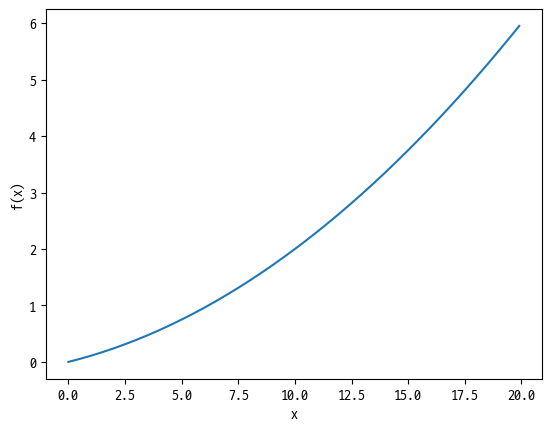

In [11]:
# numerical differential example
def function_1(x):
    return 0.01 * x ** 2  + 0.1 * x

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x,y);

In [12]:
print('bad_numerical_diff')
print(bad_numerical_diff(function_1, 5))
print(bad_numerical_diff(function_1, 10))
print()

print('good_numerical_diff')
print(good_numerical_diff(function_1, 5))
print(good_numerical_diff(function_1, 10))

bad_numerical_diff
0.0
0.0

good_numerical_diff
0.1999999999990898
0.2999999999986347


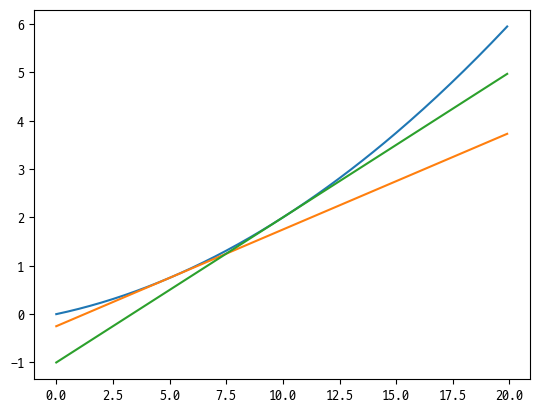

In [13]:
def tangent_line(f, x):
    d = good_numerical_diff(f, x)
    y = f(x) - d*x
    return lambda t: d*t + y

tf_5 = tangent_line(function_1, 5)
tf_10 = tangent_line(function_1, 10)
y2 = tf_5(x)
y3 = tf_10(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.plot(x, y3);

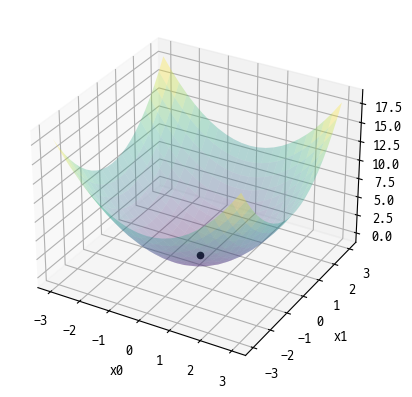

In [60]:
# x0^2 + x1^2 graph
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x0, x1):
    return x0**2 + x1**2

# data
x0 = np.linspace(3, -3, 23)
x1 = np.linspace(3, -3, 23)
x0, x1 = np.meshgrid(x0, x1)
y = f(x0, x1)

# generate 3D graph
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x0, x1, y, cmap = 'viridis', alpha = 0.3)

# x0=0, x1=0 point
ax.scatter(0, 0, f(0, 0), color='black', label='Point (0, 0)')

ax.set_xlabel('x0')
ax.set_ylabel('x1');

In [15]:
# partial derivative example
def function_2(x):
    return x[0]**2 + x[1] ** 2

# x0 = 3, x1 = 4 partial derivative to x0
def function_tmp1(x0):
    return x0 * x0 + 4.0 **2

good_numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [16]:
# x0 = 3, x1 = 4 partial derivative to x1
def function_tmp2(x1):
    return 3.0 ** 2.0 + x1 * x1

good_numerical_diff(function_tmp2, 4.0)

7.999999999999119

In [19]:
# gradient

def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [21]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


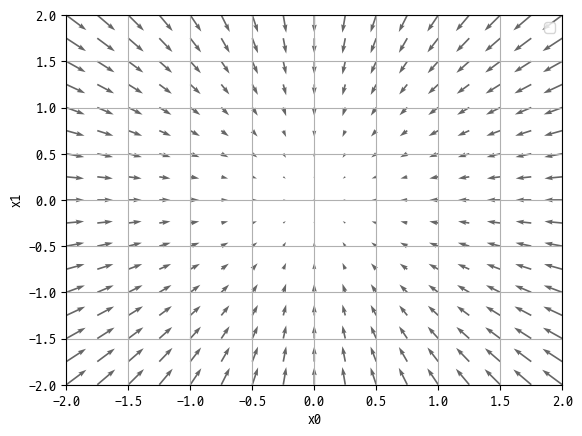

In [62]:
# x0^2 + x1^2 gradient
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

def _numerical_gradient_no_batch(f, x):
    h = 1e-4
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

In [63]:
# gradient descent method
def gradient_descent(f, init_x, lr = 0.01, step_num = 100):
    x = init_x

    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x